In [42]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [49]:
def pre_process_mnist_01():
    """
    Load the mnist datasets, selects the classes 0 and 1 
    and normalize the data.
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    X_mnist, y_mnist = fetch_openml('mnist_784', version=1, 
                                    return_X_y=True, as_frame=False)
    indicator_01 = (y_mnist == '0') + (y_mnist == '1')
    X_mnist_01 = X_mnist[indicator_01]
    y_mnist_01 = y_mnist[indicator_01]
    X_train, X_test, y_train, y_test = train_test_split(X_mnist_01, y_mnist_01,
                                                        test_size=0.33,
                                                        shuffle=False)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)

    y_test = 2 * np.array([int(y) for y in y_test]) - 1
    y_train = 2 * np.array([int(y) for y in y_train]) - 1
    return X_train, X_test, y_train, y_test

In [50]:
def sub_sample(N_train, X_train, y_train):
    """
    Subsample the training data to keep only N first elements
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    assert N_train <= X_train.shape[0]
    return X_train[:N_train, :], y_train[:N_train]


In [51]:
X_train, X_test, y_train, y_test = pre_process_mnist_01()

In [54]:
print(y_train.shape, X_train.shape)

(9902,) (9902, 784)


In [5]:
clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=0.01, 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    verbose=1)
clf.fit(X_train, y_train)

# test = classification_error(clf, X_test, y_test)
# train = classification_error(clf, X_train, y_train)
# print('train: ', train, end='\t')
# print('test: ', test)

-- Epoch 1
Norm: 0.69, NNZs: 293, Bias: -0.006399, T: 9902, Avg. loss: 0.042101
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 259, Bias: -0.006293, T: 19804, Avg. loss: 0.032082
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 243, Bias: -0.006048, T: 29706, Avg. loss: 0.030335
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 230, Bias: -0.005703, T: 39608, Avg. loss: 0.029411
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 222, Bias: -0.005324, T: 49510, Avg. loss: 0.028754
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 0.96, NNZs: 217, Bias: -0.004908, T: 59412, Avg. loss: 0.028354
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 216, Bias: -0.004476, T: 69314, Avg. loss: 0.028000
Total training time: 0.27 seconds.
-- Epoch 8
Norm: 1.01, NNZs: 212, Bias: -0.004030, T: 79216, Avg. loss: 0.027746
Total training time: 0.31 seconds.
Convergence after 8 epochs took 0.31 seconds


SGDClassifier(alpha=0.01, eta0=0.01, learning_rate='invscaling', loss='log',
              penalty='l1', verbose=1)

In [85]:
# Q25

def classification_error(clf, X, y):
    return np.sum(clf.predict(X) != y) / y.shape[0]

In [86]:
# Q26
from collections import defaultdict

X_train, y_train = sub_sample(100, X_train, y_train)

q26_res = defaultdict(list)

for alpha in [0.0001, 0.0003, 0.0007, 0.001, 0.003, 0.007, 0.01, 0.03, 0.07, 0.1]:
    for _ in range(10):
        clf = SGDClassifier(loss='log', max_iter=1000, 
                        tol=1e-3,
                        penalty='l1', alpha=alpha, 
                        learning_rate='invscaling', 
                        power_t=0.5,                
                        eta0=0.01,
                        verbose=1)
        clf.fit(X_train, y_train)
        
        q26_res[alpha].append(classification_error(clf, X_test, y_test))

-- Epoch 1
Norm: 0.32, NNZs: 606, Bias: -0.002898, T: 100, Avg. loss: 0.152402
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.35, NNZs: 516, Bias: -0.001951, T: 200, Avg. loss: 0.073146
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.38, NNZs: 476, Bias: -0.001393, T: 300, Avg. loss: 0.059174
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.39, NNZs: 440, Bias: -0.000943, T: 400, Avg. loss: 0.051510
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.41, NNZs: 420, Bias: -0.000632, T: 500, Avg. loss: 0.046519
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.42, NNZs: 414, Bias: -0.000364, T: 600, Avg. loss: 0.042859
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 412, Bias: -0.000149, T: 700, Avg. loss: 0.040037
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 414, Bias: 0.000029, T: 800, Avg. loss: 0.037750
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.44, NNZs: 416, Bias: 0.000204, T: 900, Avg. loss: 0.035839
Total train

-- Epoch 1
Norm: 0.30, NNZs: 607, Bias: 0.016375, T: 100, Avg. loss: 0.157583
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 607, Bias: 0.017755, T: 200, Avg. loss: 0.070691
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.36, NNZs: 607, Bias: 0.018469, T: 300, Avg. loss: 0.056601
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.38, NNZs: 607, Bias: 0.018979, T: 400, Avg. loss: 0.049169
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.39, NNZs: 607, Bias: 0.019366, T: 500, Avg. loss: 0.044306
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.40, NNZs: 606, Bias: 0.019694, T: 600, Avg. loss: 0.040782
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 607, Bias: 0.019978, T: 700, Avg. loss: 0.038066
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.42, NNZs: 607, Bias: 0.020217, T: 800, Avg. loss: 0.035879
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 606, Bias: 0.020437, T: 900, Avg. loss: 0.034067
Total training tim

Norm: 0.46, NNZs: 524, Bias: 0.016869, T: 1400, Avg. loss: 0.028567
Total training time: 0.01 seconds.
-- Epoch 15
Norm: 0.46, NNZs: 521, Bias: 0.016975, T: 1500, Avg. loss: 0.027728
Total training time: 0.01 seconds.
-- Epoch 16
Norm: 0.47, NNZs: 517, Bias: 0.017075, T: 1600, Avg. loss: 0.026963
Total training time: 0.01 seconds.
-- Epoch 17
Norm: 0.47, NNZs: 510, Bias: 0.017170, T: 1700, Avg. loss: 0.026264
Total training time: 0.01 seconds.
-- Epoch 18
Norm: 0.48, NNZs: 508, Bias: 0.017259, T: 1800, Avg. loss: 0.025623
Total training time: 0.01 seconds.
Convergence after 18 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.31, NNZs: 502, Bias: 0.003516, T: 100, Avg. loss: 0.153256
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.35, NNZs: 493, Bias: 0.004588, T: 200, Avg. loss: 0.073749
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.37, NNZs: 491, Bias: 0.005260, T: 300, Avg. loss: 0.058941
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.39, NNZs: 489, Bias: 0.005739, T:

Norm: 0.47, NNZs: 412, Bias: 0.009413, T: 1800, Avg. loss: 0.027220
Total training time: 0.01 seconds.
Convergence after 18 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.31, NNZs: 477, Bias: 0.007425, T: 100, Avg. loss: 0.161894
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 465, Bias: 0.008878, T: 200, Avg. loss: 0.072473
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.37, NNZs: 451, Bias: 0.009640, T: 300, Avg. loss: 0.058465
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.38, NNZs: 446, Bias: 0.010247, T: 400, Avg. loss: 0.050907
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.40, NNZs: 444, Bias: 0.010696, T: 500, Avg. loss: 0.046006
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 439, Bias: 0.011064, T: 600, Avg. loss: 0.042439
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 438, Bias: 0.011376, T: 700, Avg. loss: 0.039688
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 437, Bias: 0.011654, T: 800, Av

-- Epoch 1
Norm: 0.31, NNZs: 393, Bias: 0.001502, T: 100, Avg. loss: 0.151695
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.35, NNZs: 396, Bias: 0.003150, T: 200, Avg. loss: 0.074272
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.37, NNZs: 396, Bias: 0.004131, T: 300, Avg. loss: 0.060508
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.39, NNZs: 393, Bias: 0.004858, T: 400, Avg. loss: 0.053131
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.40, NNZs: 392, Bias: 0.005461, T: 500, Avg. loss: 0.048264
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 391, Bias: 0.005934, T: 600, Avg. loss: 0.044713
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 390, Bias: 0.006342, T: 700, Avg. loss: 0.041988
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 390, Bias: 0.006705, T: 800, Avg. loss: 0.039794
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.44, NNZs: 389, Bias: 0.007025, T: 900, Avg. loss: 0.037949
Total training tim

Norm: 0.46, NNZs: 348, Bias: 0.021435, T: 1000, Avg. loss: 0.045840
Total training time: 0.01 seconds.
-- Epoch 11
Norm: 0.46, NNZs: 340, Bias: 0.021750, T: 1100, Avg. loss: 0.044517
Total training time: 0.01 seconds.
-- Epoch 12
Norm: 0.47, NNZs: 334, Bias: 0.022038, T: 1200, Avg. loss: 0.043380
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 0.48, NNZs: 334, Bias: 0.022313, T: 1300, Avg. loss: 0.042339
Total training time: 0.01 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 333, Bias: 0.022569, T: 1400, Avg. loss: 0.041433
Total training time: 0.01 seconds.
-- Epoch 15
Norm: 0.49, NNZs: 333, Bias: 0.022815, T: 1500, Avg. loss: 0.040643
Total training time: 0.01 seconds.
-- Epoch 16
Norm: 0.49, NNZs: 331, Bias: 0.023048, T: 1600, Avg. loss: 0.039887
Total training time: 0.01 seconds.
-- Epoch 17
Norm: 0.50, NNZs: 331, Bias: 0.023271, T: 1700, Avg. loss: 0.039206
Total training time: 0.01 seconds.
-- Epoch 18
Norm: 0.50, NNZs: 330, Bias: 0.023484, T: 1800, Avg. loss: 0.038581
Total traini

Norm: 0.37, NNZs: 325, Bias: 0.008721, T: 200, Avg. loss: 0.107112
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.40, NNZs: 320, Bias: 0.010105, T: 300, Avg. loss: 0.095622
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 310, Bias: 0.011142, T: 400, Avg. loss: 0.089508
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.44, NNZs: 300, Bias: 0.012026, T: 500, Avg. loss: 0.084896
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 291, Bias: 0.012805, T: 600, Avg. loss: 0.082084
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.47, NNZs: 285, Bias: 0.013506, T: 700, Avg. loss: 0.079859
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.48, NNZs: 283, Bias: 0.014138, T: 800, Avg. loss: 0.078233
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.50, NNZs: 276, Bias: 0.014724, T: 900, Avg. loss: 0.076775
Total training time: 0.01 seconds.
-- Epoch 10
Norm: 0.51, NNZs: 273, Bias: 0.015273, T: 1000, Avg. loss: 0.075675
Total training time: 0.01 s

Norm: 0.60, NNZs: 132, Bias: 0.036350, T: 1200, Avg. loss: 0.182248
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 0.61, NNZs: 130, Bias: 0.037340, T: 1300, Avg. loss: 0.181163
Total training time: 0.01 seconds.
-- Epoch 14
Norm: 0.62, NNZs: 128, Bias: 0.038282, T: 1400, Avg. loss: 0.180278
Total training time: 0.01 seconds.
-- Epoch 15
Norm: 0.63, NNZs: 125, Bias: 0.039187, T: 1500, Avg. loss: 0.179732
Total training time: 0.01 seconds.
-- Epoch 16
Norm: 0.64, NNZs: 124, Bias: 0.040064, T: 1600, Avg. loss: 0.179112
Total training time: 0.01 seconds.
-- Epoch 17
Norm: 0.65, NNZs: 123, Bias: 0.040911, T: 1700, Avg. loss: 0.178358
Total training time: 0.01 seconds.
-- Epoch 18
Norm: 0.66, NNZs: 121, Bias: 0.041729, T: 1800, Avg. loss: 0.177778
Total training time: 0.01 seconds.
Convergence after 18 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.33, NNZs: 196, Bias: 0.005569, T: 100, Avg. loss: 0.284788
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 179, Bias: 0.008765

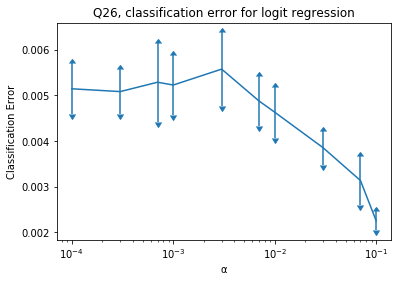

In [87]:
# Q26

q26_plot = [(alpha, np.mean(val), np.std(val)) for alpha, val in q26_res.items()]

plt.xscale('log')
plt.ylabel('Classification Error')
plt.xlabel('α')

plt.errorbar([x[0] for x in q26_plot], [x[1] for x in q26_plot], yerr=[x[2] for x in q26_plot], uplims = True, lolims = True,) 

plt.title('Q26, classification error for logit regression')
plt.savefig('fig/Q26.png')
plt.show()

-- Epoch 1
Norm: 0.29, NNZs: 607, Bias: 0.016569, T: 100, Avg. loss: 0.161701
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 606, Bias: 0.017705, T: 200, Avg. loss: 0.077209
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 607, Bias: 0.018369, T: 300, Avg. loss: 0.061724
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.37, NNZs: 605, Bias: 0.018892, T: 400, Avg. loss: 0.053508
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.39, NNZs: 606, Bias: 0.019237, T: 500, Avg. loss: 0.048130
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.40, NNZs: 606, Bias: 0.019547, T: 600, Avg. loss: 0.044234
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 607, Bias: 0.019797, T: 700, Avg. loss: 0.041228
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.41, NNZs: 607, Bias: 0.020014, T: 800, Avg. loss: 0.038816
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.42, NNZs: 607, Bias: 0.020207, T: 900, Avg. loss: 0.036814
Total training tim

-- Epoch 1
Norm: 0.32, NNZs: 209, Bias: 0.015849, T: 100, Avg. loss: 0.288356
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 182, Bias: 0.019144, T: 200, Avg. loss: 0.213703
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.43, NNZs: 169, Bias: 0.021534, T: 300, Avg. loss: 0.202709
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 162, Bias: 0.023484, T: 400, Avg. loss: 0.196844
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 153, Bias: 0.025233, T: 500, Avg. loss: 0.193417
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.50, NNZs: 148, Bias: 0.026728, T: 600, Avg. loss: 0.189847
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.52, NNZs: 142, Bias: 0.028102, T: 700, Avg. loss: 0.187406
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.54, NNZs: 136, Bias: 0.029348, T: 800, Avg. loss: 0.186216
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 133, Bias: 0.030529, T: 900, Avg. loss: 0.184582
Total training tim

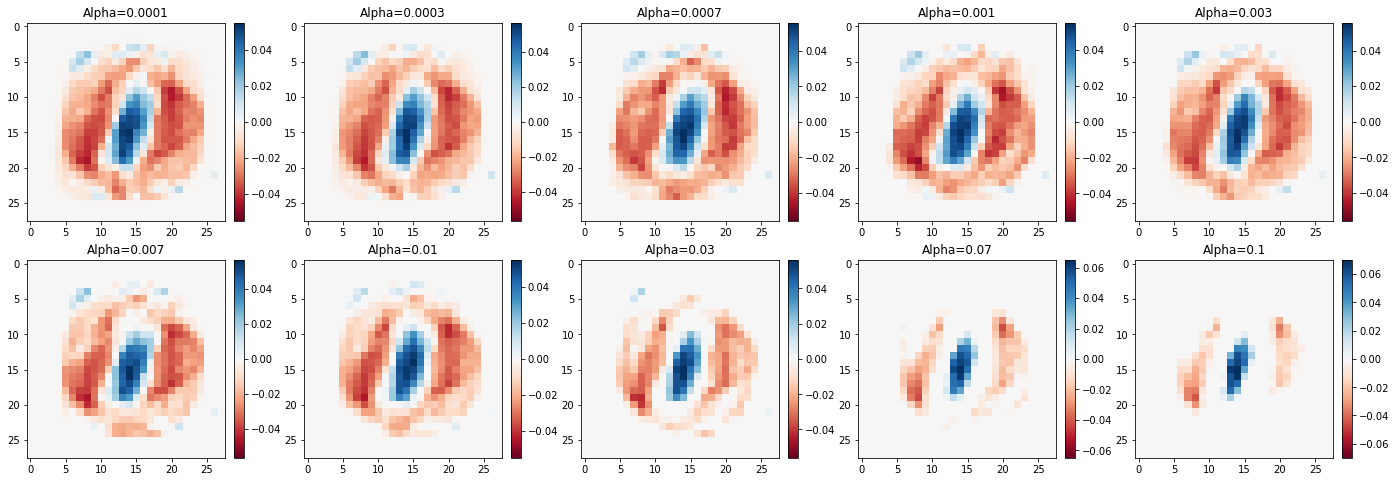

In [88]:
# Q29
X_train, y_train = sub_sample(100, X_train, y_train)

fig, axs = plt.subplots(2, 5, figsize=(24, 8))

for idx, alpha in enumerate([0.0001, 0.0003, 0.0007, 0.001, 0.003, 0.007, 0.01, 0.03, 0.07, 0.1]):
    clf = SGDClassifier(loss='log', max_iter=1000, 
                            tol=1e-3,
                            penalty='l1', alpha=alpha, 
                            learning_rate='invscaling', 
                            power_t=0.5,                
                            eta0=0.01,
                            verbose=1)
    clf.fit(X_train, y_train)

    theta = clf.coef_.reshape((28, 28))
    scale = np.abs(theta).max()
    im = axs[idx//5, idx%5].imshow(theta, cmap=plt.cm.RdBu, vmax=scale, vmin=-scale)
    axs[idx//5, idx%5].title.set_text("Alpha={}".format(alpha))
    plt.colorbar(im, ax=axs[idx//5, idx%5], fraction=0.046, pad=0.04)

plt.savefig('fig/Q29.png')